# Data dependence on g, spectral amplitude (flux) varied

In [1]:
import numpy as np
import random
import time

In [2]:
import sys
import os

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import IPython

In [5]:
import pickle

In [6]:
import swyft

In [24]:
#%matplotlib inline
%matplotlib ipympl

In [8]:
files_name = "simulate_g_values_seed" + "_files"
parent_dir = (os.getcwd()+"/").split('/notebooks/', 1)[0]
start_dir = os.getcwd()
files_dir = os.getcwd() + "/" + files_name 
store_name = files_name.split("_files")[0] + "_store"
store_dir = os.getcwd() + "/" + files_name + "/" + store_name
sys.path.append(files_dir)

In [9]:
from ALP_quick_sim import ALP_sim

In [10]:
with open(files_dir+"/"+'config_objects.pickle', 'rb') as file:
    config_objects = pickle.load(file)
for key in config_objects.keys():
    locals()[key] = config_objects[key]

with open(files_dir+"/"+'sim_objects.pickle', 'rb') as file:
    sim_objects = pickle.load(file)
for key in sim_objects.keys():
    locals()[key] = sim_objects[key]

# with open(files_dir+"/"+'obs_objects.pickle', 'rb') as file:
#     obs_objects = pickle.load(file) 
# for key in obs_objects.keys():
#     locals()[key] = obs_objects[key]

In [11]:
stores={}
samples={}
for g in g_values:    
    store = swyft.ZarrStore(store_dir + "/" + store_name + "_" + str(g).replace('.','-'))
    stores[str(g).replace('.','-')] = store
    samples[g] = store
    print('#samples for g='+str(g)+": " + str(len(samples[g])))

#samples for g=0.2: 10
#samples for g=0.4: 10
#samples for g=0.8: 10


In [18]:
store_obs = swyft.ZarrStore(start_dir + "/simulate_g_values_none_obs_files/simulate_g_values_none_obs_store/simulate_g_values_none_obs_store_0-4")

# Compare signals to posterior width

In [12]:
widths =[
    [0.2,0.4,0.8],
]

colors_widths = [
    (1,0,0),
    (0,1,0),
    (0,0,1)
]

mean_ranges = [
    [0,0.5],
    [0.6,1.2],
    [1.5,3],
]

transparency = 0.5


len_fft = 2**11
b = 3
logx = 0
logy = 1

A.fontsize = 10

# xft = np.linspace(0,bt,int(bt*((max(xs)-min(xs))/len(xs))*len_ft))

lenx = int(b*((np.log10(A.emax)-np.log10(A.emin))/A.nbins)*len_fft)
xax_ft = np.linspace(0,b,lenx)

def corrfunction(counts):
    return abs(np.fft.fft(counts,n=len_fft))


In [21]:
def comparisons(which_truth,n=np.arange(0,20,1),n_truth=np.arange(0,20,1)):
    figs ={}
    A.configure_plot(xmin = None, xmax = None, ymin=-0.14, ymax=0.1, logx=1, logy=0) 

    A.configure_plot(legend=0)
    A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="--", label_exp=1,errorbands=0)
    A.configure_obs(nbins=50, nbins_etrue=50)
    A.configure_model(params=A.null_params)
    A.import_counts(obs=store_obs['data'][2],exp=store_obs['exp'][2])
    A.compute_case(new_fig=0,new_counts=0,plot_exp=0,color="k",linestyle="--", label_obs=0, label_exp=1)
    A.configure_obs(nbins=150, nbins_etrue=150)
    A.configure_plot(legend=1)
                
    for i, g in enumerate(widths[which_truth]):
        for ki, k in enumerate(n):
            A.configure_model(params=samples[g]['params'][k])
            A.import_counts(obs=samples[g]['data'][k],exp=samples[g]['exp'][k])
            A.compute_case(new_fig=0,new_counts=0,plot_obs=0,color=colors_widths[i],
                           label_exp=int(not ki), label_obs=int(not ki), errorbands=False,errors=0,
                           transparency = transparency)


Generating new null-hypothesis... done.
Generating new null-hypothesis... done.


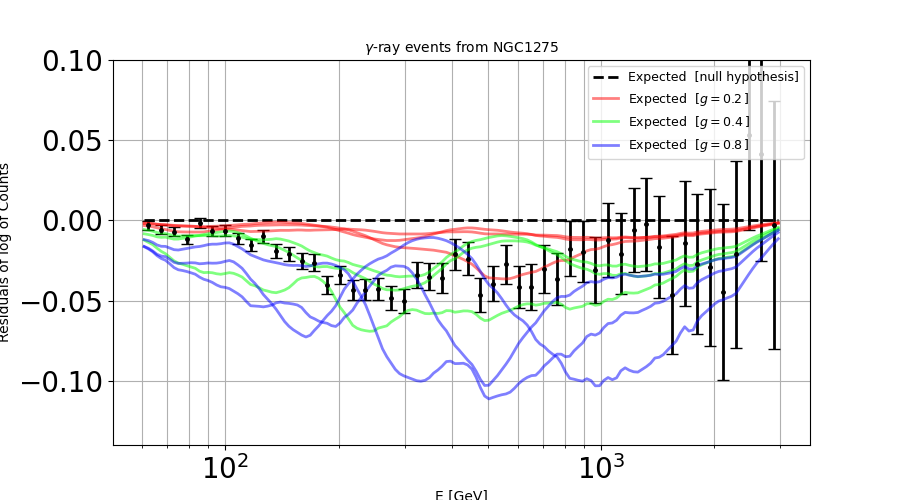

In [25]:
comparisons(0, n=np.arange(0,3,1))

Generating new null-hypothesis... done.
Generating new null-hypothesis... done.


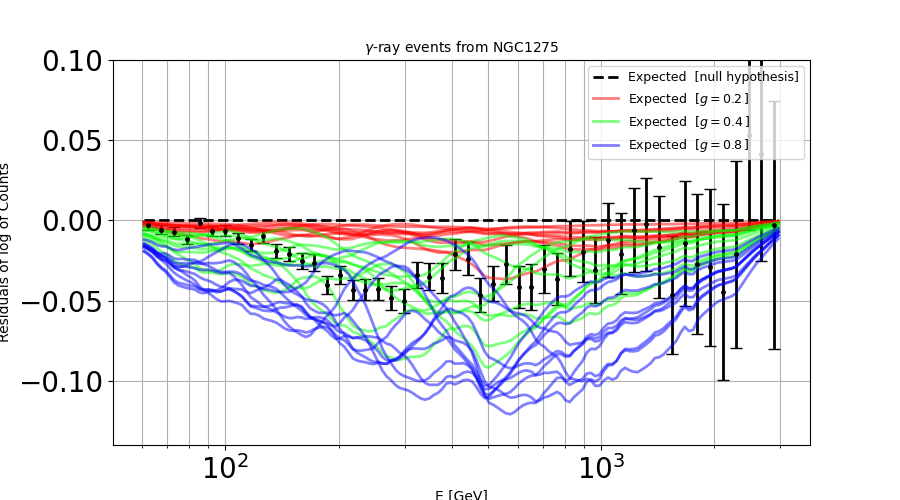

In [26]:
comparisons(0, n=np.arange(0,10,1))